# Example of usage with [Iris dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import NeuralNetwork

Iris datasets has 4 inputs and 3 classes corresponding 3 Iris species.

In [2]:
X = np.genfromtxt('iris.data', delimiter = ',', usecols = [0,1,2,3])
Y_labels = np.genfromtxt('iris.data', delimiter = ',', usecols = [4], dtype = str) 

X_size, number_of_inputs = X.shape
number_of_outputs = len(set(Y_labels))
n = X.shape[0]
labels = dict(zip(set(Y_labels), np.arange(len(set(Y_labels)))))

Y = np.zeros((X_size, number_of_outputs))
for i in range(X_size):
    Y[i, labels[Y_labels[i]]] = 1

In [3]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
Y[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

First 10 examples. 1 in 3rd position in y corresponds to 3rd class, same with 1st and 2nd.

In [5]:
net = NeuralNetwork.Network((number_of_inputs, 5, number_of_outputs))

Initialize neural network with 4 neurons in input layer, 5 in hidden layer and 3 in output layer. Also, there one hidden neuron in input and hidden layers. All weights are initialized randomly.

In [6]:
X_size = X.shape[0]
train_size = 50
train_ind = np.random.choice(X_size, train_size, replace = False)
test_ind = np.setdiff1d(np.arange(X_size), train_ind)
X_train, Y_train = X[train_ind], Y[train_ind]
X_test, Y_test = X[test_ind], Y[test_ind]

Randomly select 50 examples for training dataset and 100 for testing.

In [7]:
parameters = {'LearningRate' : 0.1, 'Regularization' : 0.005, 'Tolerance' : 1e-5, 'MaxIter' : 2000, 'PrintStep' : 100}

Set gradient descent parameters.

In [8]:
J = net.GradDesc(X_train, Y_train, **parameters)

iteration 0 	 J = 1.9486962630631173
iteration 100 	 J = 1.355803117435099
iteration 200 	 J = 1.086366111055744
iteration 300 	 J = 0.9740250806693408
iteration 400 	 J = 0.9033948732520968
iteration 500 	 J = 0.844343204445096
iteration 600 	 J = 0.7892617710503287
iteration 700 	 J = 0.7375857601359596
iteration 800 	 J = 0.6904516509672449
iteration 900 	 J = 0.6487309936977885
iteration 1000 	 J = 0.6126142807206615
iteration 1100 	 J = 0.5817765377295773
iteration 1200 	 J = 0.5556335844622691
iteration 1300 	 J = 0.5335273481475801
iteration 1400 	 J = 0.5148271275772762
iteration 1500 	 J = 0.49897319529246337
iteration 1600 	 J = 0.4854883946646256
iteration 1700 	 J = 0.47397445659029747
iteration 1800 	 J = 0.4641022837962887
iteration 1900 	 J = 0.4556007905254804
--- GradDesc finished ---


Perform gradient descent to fit parameters. eps = 1e-5 means that algorithm stops when absolute difference in cost function values between two iterations is less than 0.00001.

In [9]:
accuracy_train = 0
for k in range(len(Y_train)):
    accuracy_train += np.argmax(net.predict(X_train[k])) == np.argmax(Y_train[k])
print(f"\naccuracy on train = {accuracy_train/len(Y_train)} ({accuracy_train}/{len(Y_train)})")

accuracy_test = 0
for k in range(len(Y_test)):
    accuracy_test += np.argmax(net.predict(X_test[k])) == np.argmax(Y_test[k])
print(f"accuracy on test = {accuracy_test/len(Y_test)} ({accuracy_test}/{len(Y_test)})")


accuracy on train = 0.98 (49/50)
accuracy on test = 0.96 (96/100)


Check accuracy on training and testing datasets.

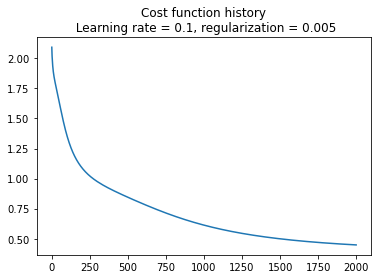

In [10]:
plt.plot(J)
plt.title(f"Cost function history\n Learning rate = {parameters['LearningRate']}, regularization = {parameters['Regularization']}")
plt.show()

Plot cost values as function of number of iteration.

In [11]:
demo_index = np.random.choice(np.arange(len(Y)), 10, replace = False)
np.set_printoptions(suppress=True)
print("neural network output \t\t\t correct output \t equals?")
for i in demo_index:
    print(f"{net.predict(X[i])} \t {Y[i]} \t\t {np.argmax(net.predict(X[i])) == np.argmax(Y[i])}")


neural network output 			 correct output 	 equals?
[0.9489461  0.00616216 0.08161717] 	 [1. 0. 0.] 		 True
[0.01975065 0.79798667 0.24579032] 	 [0. 1. 0.] 		 True
[0.02427323 0.65859143 0.34585431] 	 [0. 1. 0.] 		 True
[0.95332398 0.00591199 0.07530121] 	 [1. 0. 0.] 		 True
[0.94931758 0.00615685 0.07975944] 	 [1. 0. 0.] 		 True
[0.95509289 0.00583737 0.07747542] 	 [1. 0. 0.] 		 True
[0.95726999 0.00566894 0.0698431 ] 	 [1. 0. 0.] 		 True
[0.95746777 0.0056572  0.07060472] 	 [1. 0. 0.] 		 True
[0.09982499 0.06233804 0.7520442 ] 	 [0. 0. 1.] 		 True
[0.01798893 0.88654937 0.16344955] 	 [0. 1. 0.] 		 True


Compare some neural network outputs with correct ones.